In [11]:
from sentence_transformers import CrossEncoder
import logging
import os
import pandas as pd
import torch, gc

from financerag.rerank import CrossEncoderReranker
from financerag.retrieval import DenseRetrieval, SentenceTransformerEncoder, BM25Retriever
from financerag.tasks import ConvFinQA, FinanceBench, FinDER, FinQA, FinQABench, MultiHiertt, TATQA

# Setup basic logging configuration to show info level messages.
logging.basicConfig(level=logging.INFO)

In [12]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

# Task

In [13]:
# Step 2: Initialize FinDER Task

convfinqa_task = ConvFinQA()
finbench_task = FinanceBench()
finder_task = FinDER()
finqa_task = FinQA()
finqabench_task = FinQABench()
multih_task = MultiHiertt()
tatqa_task = TATQA()

# Initialize Model

In [ ]:
# 줄임말 확장
# 테이블을 instruction: 테이블 컴포넌트를 뽑아달라고

In [ ]:
# Step 3: Initialize DenseRetriever model
# -------------------------------------
# Initialize the retrieval model using SentenceTransformers. This model will be responsible
# for encoding both the queries and documents into embeddings.
#
# You can replace 'intfloat/e5-large-v2' with any other model supported by SentenceTransformers.
# For example: 'BAAI/bge-large-en-v1.5', 'Linq-AI-Research/Linq-Embed-Mistral', etc.
base_encoder = "BAAI/bge-large-en-v1.5"  #"BAAI/bge-large-en-v1.5" #"nvidia/NV-Embed-v2"(20GB) "intfloat/e5-mistral-7b-instruct"(9GB) 
                                            #"dunzhang/stella_en_1.5B_v5" (6GB)  "jinaai/jina-embeddings-v3"(1.1GB) "jinaai/jina-embeddings-v2-base-code"(320MB)
encoder_model = SentenceTransformerEncoder(
    model_name_or_path=base_encoder,
    query_prompt='query: ',
    doc_prompt='passage: '
)

retrieval_model = DenseRetrieval(
    model=encoder_model
)

INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cuda
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-large-en-v1.5


# Perform Model

In [8]:
# Step 4: Perform retrieval

print("Working on ConvfinQA Task")
convfinqa_result = convfinqa_task.retrieve(
    retriever=retrieval_model)
torch.cuda.empty_cache()
print("Working on FinBench Task")
finbench_result = finbench_task.retrieve(
    retriever=retrieval_model)
torch.cuda.empty_cache()
print("Working on FinDER Task")
finder_result = finder_task.retrieve(
    retriever=retrieval_model)
torch.cuda.empty_cache()
print("Working on FinQA Task")
finqa_result = finqa_task.retrieve(
    retriever=retrieval_model)
torch.cuda.empty_cache()
print("Working on FinQABench Task")
finqabench_result = finqabench_task.retrieve(
    retriever=retrieval_model)
torch.cuda.empty_cache()
print("Working on MultiHiertt Task")
multih_result = multih_task.retrieve(
    retriever=retrieval_model)
torch.cuda.empty_cache()
print("Working on TATQA Task")
tatqa_result = tatqa_task.retrieve(
    retriever=retrieval_model)
torch.cuda.empty_cache()

results = [
    convfinqa_result,
    finbench_result,
    finder_result,
    finqa_result,
    finqabench_result,
    multih_result,
    tatqa_result
]


INFO:financerag.retrieval.dense:Encoding queries...


Working on ConvfinQA Task


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/33 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Encoding queries...


Working on FinBench Task


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Encoding queries...


Working on FinDER Task


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/217 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Encoding queries...


Working on FinQA Task


Batches:   0%|          | 0/18 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/44 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Encoding queries...


Working on FinQABench Task


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Encoding queries...


Working on MultiHiertt Task


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/164 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Encoding queries...


Working on TATQA Task


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/44 [00:00<?, ?it/s]

In [9]:
# Print a portion of the retrieval results to verify the output.
for result in results:
    print(f"Retrieved results for {len(result)} queries. Here's an example of the top 5 documents for the first query:")

for result in results:
    for q_id, res in result.items():
        print(f"\nQuery ID: {q_id}")
        # Sort the result to print the top 5 document ID and its score
        sorted_results = sorted(res.items(), key=lambda x: x[1], reverse=True)

        for i, (doc_id, score) in enumerate(sorted_results[:5]):
            print(f"  Document {i + 1}: Document ID = {doc_id}, Score = {score}")

        break  # Only show the first query

Retrieved results for 421 queries. Here's an example of the top 5 documents for the first query:
Retrieved results for 150 queries. Here's an example of the top 5 documents for the first query:
Retrieved results for 216 queries. Here's an example of the top 5 documents for the first query:
Retrieved results for 1147 queries. Here's an example of the top 5 documents for the first query:
Retrieved results for 100 queries. Here's an example of the top 5 documents for the first query:
Retrieved results for 974 queries. Here's an example of the top 5 documents for the first query:
Retrieved results for 1663 queries. Here's an example of the top 5 documents for the first query:

Query ID: qd4982518
  Document 1: Document ID = dd4bae6b6, Score = 0.724717915058136
  Document 2: Document ID = dd4bc7c60, Score = 0.7226961851119995
  Document 3: Document ID = dd4bc7b52, Score = 0.7214202880859375
  Document 4: Document ID = dd4be45d6, Score = 0.7178887128829956
  Document 5: Document ID = dd4c4c2

## Evaluation

In [10]:
def get_evalset(dataset_name):
    qrels = {}
    df_qrels = pd.read_csv(f"../data/{dataset_name}_qrels.tsv", sep='\t')
    for _, row in df_qrels.iterrows():
        if row['query_id'] not in qrels:
            qrels[row['query_id']] = {}
        qrels[row['query_id']][row['corpus_id']] = row['score']
    return qrels

In [ ]:
tasks = [
    convfinqa_task,
    finbench_task,
    finder_task,
    finqa_task,
    finqabench_task,
    multih_task,
    tatqa_task
]

qrels = [
    get_evalset('ConvFinQA'),
    get_evalset('FinanceBench'),
    get_evalset('FinDER'),
    get_evalset('FinQA'),
    get_evalset('FinQABench'),
    get_evalset('MultiHeirtt'),
    get_evalset('TATQA')
]

retrieve_ndcgs = []

for qrel, task in zip(qrels, tasks):
    metrics = task.evaluate(qrels=qrel, results=task.retrieve_results, k_values=[10])
    retrieve_ndcgs.append()

INFO:financerag.tasks.BaseTask:For evaluation, we ignore identical query and document ids (default), please explicitly set ``ignore_identical_ids=False`` to ignore this.
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:NDCG@10: 0.2366
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:MAP@10: 0.1874
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:Recall@10: 0.3968
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:P@10: 0.0397
INFO:financerag.tasks.BaseTask:For evaluation, we ignore identical query and document ids (default), please explicitly set ``ignore_identical_ids=False`` to ignore this.
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:NDCG@10: 0.7788
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:MAP@10: 0.7036
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:Recall@10: 0.9778
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:P@10: 0.1289
INFO:financerag.tasks.Ba

INFO:financerag.tasks.BaseTask:For evaluation, we ignore identical query and document ids (default), please explicitly set ``ignore_identical_ids=False`` to ignore this.
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:NDCG@10: 0.2366
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:MAP@10: 0.1874
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:Recall@10: 0.3968
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:P@10: 0.0397
INFO:financerag.tasks.BaseTask:For evaluation, we ignore identical query and document ids (default), please explicitly set ``ignore_identical_ids=False`` to ignore this.
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:NDCG@10: 0.7788
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:MAP@10: 0.7036
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:Recall@10: 0.9778
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:P@10: 0.1289
INFO:financerag.tasks.Ba

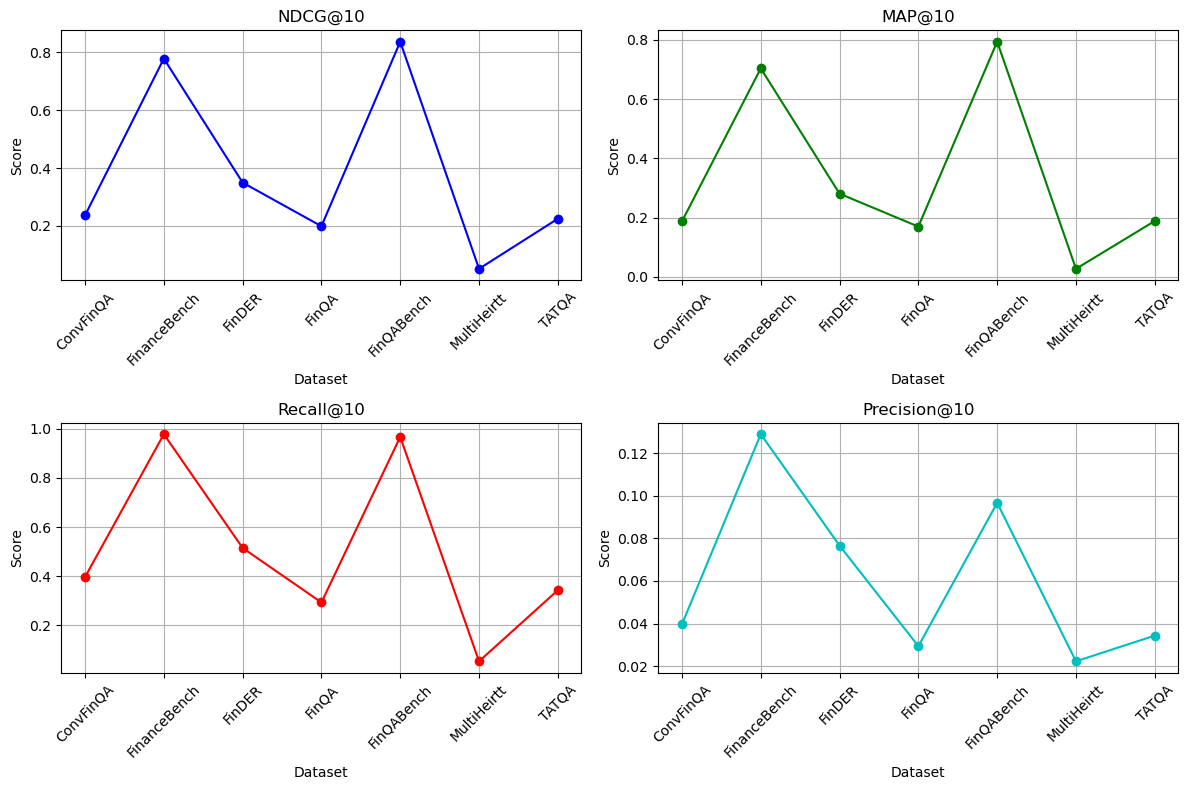

In [43]:
import matplotlib.pyplot as plt

# 각 평가지표를 저장할 리스트
ndcg_values = []
map_values = []
recall_values = []
precision_values = []

# 데이터셋 이름 리스트
dataset_names = [
    'ConvFinQA',
    'FinanceBench',
    'FinDER',
    'FinQA',
    'FinQABench',
    'MultiHeirtt',
    'TATQA'
]

# 예시로 몇 개의 쿼리(task)에 대해 평가 결과 저장하기
for qrel, task in zip(qrels, tasks):
    # 평가지표 평가
    metrics = task.evaluate(qrels=qrel, results=task.retrieve_results, k_values=[10])

    # metrics가 튜플 형태이므로 각 딕셔너리에서 값을 추출
    ndcg_values.append(metrics[0]['NDCG@10'])  # NDCG@10
    map_values.append(metrics[1]['MAP@10'])    # MAP@10
    recall_values.append(metrics[2]['Recall@10'])  # Recall@10
    precision_values.append(metrics[3]['P@10'])  # P@10

# 그래프 생성
plt.figure(figsize=(12, 8))

# NDCG@10 시각화
plt.subplot(2, 2, 1)
plt.plot(ndcg_values, marker='o', label='NDCG@10', color='b')
plt.title('NDCG@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

# MAP@10 시각화
plt.subplot(2, 2, 2)
plt.plot(map_values, marker='o', label='MAP@10', color='g')
plt.title('MAP@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

# Recall@10 시각화
plt.subplot(2, 2, 3)
plt.plot(recall_values, marker='o', label='Recall@10', color='r')
plt.title('Recall@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

# Precision@10 시각화
plt.subplot(2, 2, 4)
plt.plot(precision_values, marker='o', label='P@10', color='c')
plt.title('Precision@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()

# Initialize Reranker

"jinaai/jina-reranker-v2-base-multilingual",
            "Alibaba-NLP/gte-multilingual-reranker-base",
        "BAAI/bge-reranker-v2-m3"

In [28]:
# Step 5: Initialize CrossEncoder Reranker
base_reranker = "BAAI/bge-reranker-base" #"jinaai/jina-reranker-v2-base-multilingual" #'cross-encoder/ms-marco-MiniLM-L-12-v2' #"BAAI/bge-reranker-base"

reranker = CrossEncoderReranker(
    model=CrossEncoder(base_reranker)
)



INFO:sentence_transformers.cross_encoder.CrossEncoder:Use pytorch device: cuda


# Perform Reranking

In [31]:
# Step 6: Perform reranking

top_k= 64 # Number of Reranking results
batch_size = 32 # 32

print("\nWorking on ConvFinQA Reranking")
convfinqa_rerank = convfinqa_task.rerank(
    reranker=reranker,
    results=convfinqa_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinBench Reranking")
finbench_rerank = finbench_task.rerank(
    reranker=reranker,
    results=finbench_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinDER Reranking")
finder_rerank = finder_task.rerank(
    reranker=reranker,
    results=finder_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinQA Reranking")
finqa_rerank = finqa_task.rerank(
    reranker=reranker,
    results=finqa_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinQABench Reranking")
finqabench_rerank = finqabench_task.rerank(
    reranker=reranker,
    results=finqabench_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on MultiHiertt Reranking")
multih_rerank = multih_task.rerank(
    reranker=reranker,
    results=multih_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on TATQA Reranking")
tatqa_rerank = tatqa_task.rerank(
    reranker=reranker,
    results=tatqa_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
reranking_results = [
    convfinqa_rerank,
    finbench_rerank,
    finder_rerank,
    finqa_rerank,
    finqabench_rerank,
    multih_rerank,
    tatqa_rerank
]


INFO:financerag.rerank.cross_encoder:Starting To Rerank Top-64....



Working on ConvFinQA Reranking


Batches:   0%|          | 0/842 [00:00<?, ?it/s]

INFO:financerag.rerank.cross_encoder:Starting To Rerank Top-64....



Working on FinBench Reranking


Batches:   0%|          | 0/300 [00:00<?, ?it/s]

INFO:financerag.rerank.cross_encoder:Starting To Rerank Top-64....



Working on FinDER Reranking


Batches:   0%|          | 0/432 [00:00<?, ?it/s]


Working on FinQA Reranking


INFO:financerag.rerank.cross_encoder:Starting To Rerank Top-64....


Batches:   0%|          | 0/2294 [00:00<?, ?it/s]

INFO:financerag.rerank.cross_encoder:Starting To Rerank Top-64....



Working on FinQABench Reranking


Batches:   0%|          | 0/200 [00:00<?, ?it/s]


Working on MultiHiertt Reranking


INFO:financerag.rerank.cross_encoder:Starting To Rerank Top-64....


Batches:   0%|          | 0/1948 [00:00<?, ?it/s]


Working on TATQA Reranking


INFO:financerag.rerank.cross_encoder:Starting To Rerank Top-64....


Batches:   0%|          | 0/3326 [00:00<?, ?it/s]

In [33]:
for i, rerank_result in enumerate(reranking_results):
    print(f"\nReranking results for Task {i + 1} ({len(rerank_result)} queries). Here's an example of the top 5 documents for the first query:")

    for q_id, result in rerank_result.items():
        print(f"\nQuery ID: {q_id}")
        
        sorted_results = sorted(result.items(), key=lambda x: x[1], reverse=True)

        for i, (doc_id, score) in enumerate(sorted_results[:5]):
            print(f"  Document {i + 1}: Document ID = {doc_id}, Score = {score}")

        break  # Only show the first query for each task


Reranking results for Task 1 (421 queries). Here's an example of the top 5 documents for the first query:

Query ID: qd4982518
  Document 1: Document ID = dd4b9f7f6, Score = 0.8479565978050232
  Document 2: Document ID = dd4bf84f0, Score = 0.8204060792922974
  Document 3: Document ID = dd4ba3af4, Score = 0.8011924028396606
  Document 4: Document ID = dd4c3b9da, Score = 0.7807997465133667
  Document 5: Document ID = dd4971510, Score = 0.7743793725967407

Reranking results for Task 2 (150 queries). Here's an example of the top 5 documents for the first query:

Query ID: qd2ac917a
  Document 1: Document ID = dd2abf0b2, Score = 0.008676055818796158
  Document 2: Document ID = dd2acce74, Score = 0.007366302888840437
  Document 3: Document ID = dd2abfb48, Score = 0.0054214405827224255
  Document 4: Document ID = dd2ac410c, Score = 0.0036554832477122545
  Document 5: Document ID = dd2abf562, Score = 0.0027260142378509045

Reranking results for Task 3 (216 queries). Here's an example of the t

## Evaluation

In [36]:
# 앞에서 평가 한번 한다음에 돌려야됌!

rerank_ndcgs = []

for qrel, task in zip(qrels, tasks):
    metrics = task.evaluate(qrels=qrel, results=task.rerank_results, k_values=[10])
    #rerank_ndcgs.append()

INFO:financerag.tasks.BaseTask:For evaluation, we ignore identical query and document ids (default), please explicitly set ``ignore_identical_ids=False`` to ignore this.
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:NDCG@10: 0.3991
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:MAP@10: 0.3668
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:Recall@10: 0.5000
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:P@10: 0.0500
INFO:financerag.tasks.BaseTask:For evaluation, we ignore identical query and document ids (default), please explicitly set ``ignore_identical_ids=False`` to ignore this.
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:NDCG@10: 0.6946
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:MAP@10: 0.6250
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:Recall@10: 0.8778
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:P@10: 0.1111
INFO:financerag.tasks.Ba

INFO:financerag.tasks.BaseTask:For evaluation, we ignore identical query and document ids (default), please explicitly set ``ignore_identical_ids=False`` to ignore this.
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:NDCG@10: 0.3991
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:MAP@10: 0.3668
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:Recall@10: 0.5000
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:P@10: 0.0500
INFO:financerag.tasks.BaseTask:For evaluation, we ignore identical query and document ids (default), please explicitly set ``ignore_identical_ids=False`` to ignore this.
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:NDCG@10: 0.6946
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:MAP@10: 0.6250
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:Recall@10: 0.8778
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:P@10: 0.1111
INFO:financerag.tasks.Ba

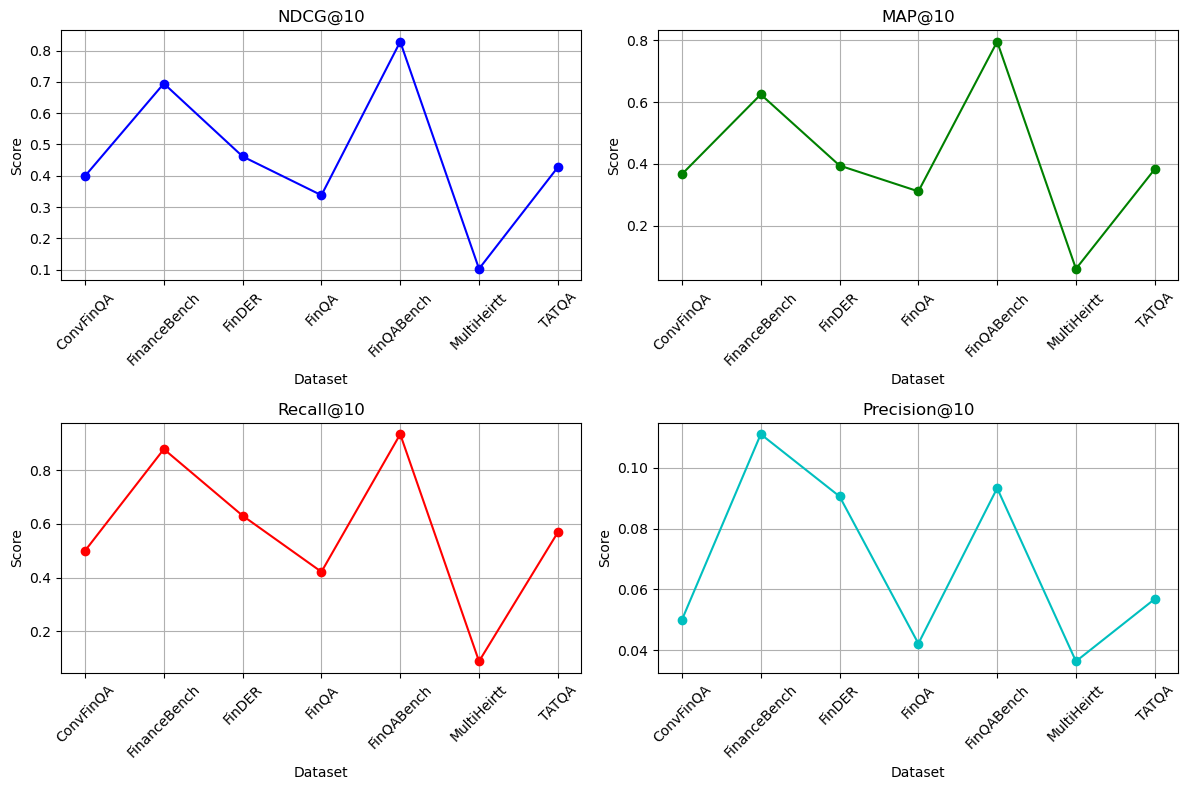

In [40]:
import matplotlib.pyplot as plt

# 각 평가지표를 저장할 리스트
ndcg_values = []
map_values = []
recall_values = []
precision_values = []

# 데이터셋 이름 리스트
dataset_names = [
    'ConvFinQA',
    'FinanceBench',
    'FinDER',
    'FinQA',
    'FinQABench',
    'MultiHeirtt',
    'TATQA'
]

# 예시로 몇 개의 쿼리(task)에 대해 평가 결과 저장하기
for qrel, task in zip(qrels, tasks):
    # 평가지표 평가
    metrics = task.evaluate(qrels=qrel, results=task.rerank_results, k_values=[10])

    # metrics가 튜플 형태이므로 각 딕셔너리에서 값을 추출
    ndcg_values.append(metrics[0]['NDCG@10'])  # NDCG@10
    map_values.append(metrics[1]['MAP@10'])    # MAP@10
    recall_values.append(metrics[2]['Recall@10'])  # Recall@10
    precision_values.append(metrics[3]['P@10'])  # P@10

# 그래프 생성
plt.figure(figsize=(12, 8))

# NDCG@10 시각화
plt.subplot(2, 2, 1)
plt.plot(ndcg_values, marker='o', label='NDCG@10', color='b')
plt.title('NDCG@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

# MAP@10 시각화
plt.subplot(2, 2, 2)
plt.plot(map_values, marker='o', label='MAP@10', color='g')
plt.title('MAP@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

# Recall@10 시각화
plt.subplot(2, 2, 3)
plt.plot(recall_values, marker='o', label='Recall@10', color='r')
plt.title('Recall@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

# Precision@10 시각화
plt.subplot(2, 2, 4)
plt.plot(precision_values, marker='o', label='P@10', color='c')
plt.title('Precision@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()


INFO:financerag.tasks.BaseTask:For evaluation, we ignore identical query and document ids (default), please explicitly set ``ignore_identical_ids=False`` to ignore this.
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:NDCG@10: 0.2366
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:MAP@10: 0.1874
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:Recall@10: 0.3968
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:P@10: 0.0397
INFO:financerag.tasks.BaseTask:For evaluation, we ignore identical query and document ids (default), please explicitly set ``ignore_identical_ids=False`` to ignore this.
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:NDCG@10: 0.3991
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:MAP@10: 0.3668
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:Recall@10: 0.5000
INFO:financerag.tasks.BaseTask:

INFO:financerag.tasks.BaseTask:P@10: 0.0500
INFO:financerag.tasks.Ba

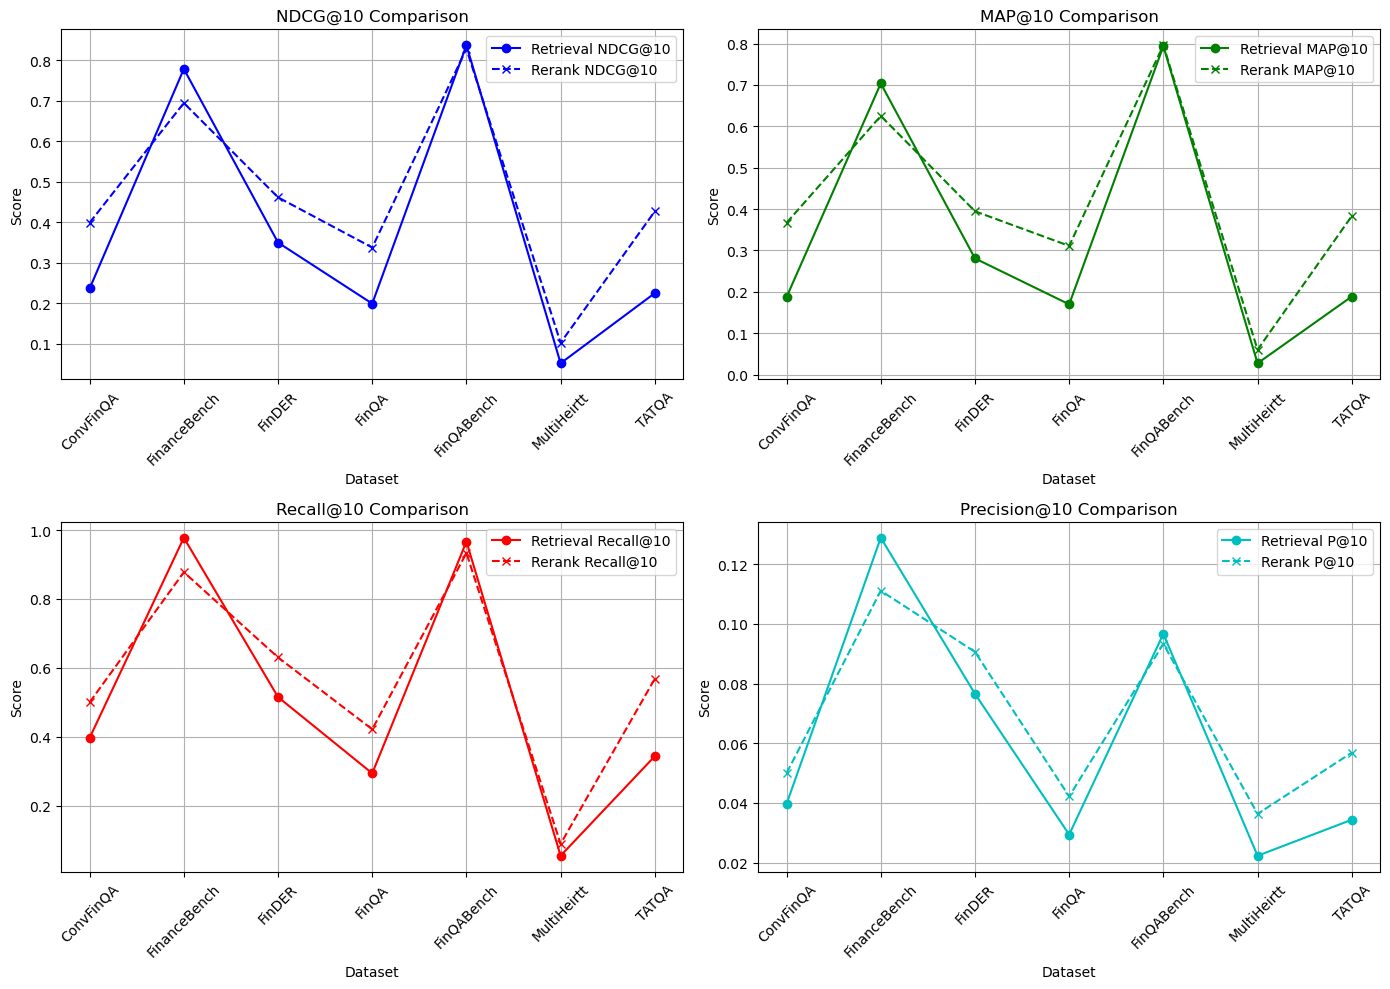

In [44]:
import matplotlib.pyplot as plt

# 각 평가지표를 저장할 리스트
retrieval_ndcg_values = []
rerank_ndcg_values = []

retrieval_map_values = []
rerank_map_values = []

retrieval_recall_values = []
rerank_recall_values = []

retrieval_precision_values = []
rerank_precision_values = []

# 데이터셋 이름 리스트
dataset_names = [
    'ConvFinQA',
    'FinanceBench',
    'FinDER',
    'FinQA',
    'FinQABench',
    'MultiHeirtt',
    'TATQA'
]

# 예시로 몇 개의 쿼리(task)에 대해 평가 결과 저장하기
for qrel, task in zip(qrels, tasks):
    # 평가지표 평가 (retrieval 결과)
    retrieval_metrics = task.evaluate(qrels=qrel, results=task.retrieve_results, k_values=[10])
    
    # 평가지표 평가 (rerank 결과)
    rerank_metrics = task.evaluate(qrels=qrel, results=task.rerank_results, k_values=[10])

    # retrieval 결과에서 각 지표 값 저장
    retrieval_ndcg_values.append(retrieval_metrics[0]['NDCG@10'])
    retrieval_map_values.append(retrieval_metrics[1]['MAP@10'])
    retrieval_recall_values.append(retrieval_metrics[2]['Recall@10'])
    retrieval_precision_values.append(retrieval_metrics[3]['P@10'])
    
    # rerank 결과에서 각 지표 값 저장
    rerank_ndcg_values.append(rerank_metrics[0]['NDCG@10'])
    rerank_map_values.append(rerank_metrics[1]['MAP@10'])
    rerank_recall_values.append(rerank_metrics[2]['Recall@10'])
    rerank_precision_values.append(rerank_metrics[3]['P@10'])

# 그래프 생성
plt.figure(figsize=(14, 10))

# NDCG@10 시각화
plt.subplot(2, 2, 1)
plt.plot(retrieval_ndcg_values, marker='o', label='Retrieval NDCG@10', color='b')
plt.plot(rerank_ndcg_values, marker='x', label='Rerank NDCG@10', color='b', linestyle='--')
plt.title('NDCG@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.legend()
plt.grid(True)

# MAP@10 시각화
plt.subplot(2, 2, 2)
plt.plot(retrieval_map_values, marker='o', label='Retrieval MAP@10', color='g')
plt.plot(rerank_map_values, marker='x', label='Rerank MAP@10', color='g', linestyle='--')
plt.title('MAP@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.legend()
plt.grid(True)

# Recall@10 시각화
plt.subplot(2, 2, 3)
plt.plot(retrieval_recall_values, marker='o', label='Retrieval Recall@10', color='r')
plt.plot(rerank_recall_values, marker='x', label='Rerank Recall@10', color='r', linestyle='--')
plt.title('Recall@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.legend()
plt.grid(True)

# Precision@10 시각화
plt.subplot(2, 2, 4)
plt.plot(retrieval_precision_values, marker='o', label='Retrieval P@10', color='c')
plt.plot(rerank_precision_values, marker='x', label='Rerank P@10', color='c', linestyle='--')
plt.title('Precision@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.legend()
plt.grid(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()


# Save Results

In [34]:
os.getcwd()

'c:\\Users\\God_YJ\\interns\\DS_COMP\\FinanceRAG-main'

In [35]:
# Step 7: Save results
results_dir = './financerag/results/'
subfolder = 'submission_11122200'

output_dir = results_dir+subfolder

for i, rerank_result in enumerate(reranking_results):
    convfinqa_task.save_results(output_dir=output_dir)
    finbench_task.save_results(output_dir=output_dir)
    finder_task.save_results(output_dir=output_dir)
    finqa_task.save_results(output_dir=output_dir)
    finqabench_task.save_results(output_dir=output_dir)
    multih_task.save_results(output_dir=output_dir)
    tatqa_task.save_results(output_dir=output_dir)

csv_files = [
    output_dir + '/ConvFinQA/results.csv',
    output_dir + '/FinanceBench/results.csv',
    output_dir + '/FinDER/results.csv',
    output_dir + '/FinQA/results.csv',
    output_dir + '/FinQABench/results.csv',
    output_dir + '/MultiHiertt/results.csv',
    output_dir + '/TAT-QA/results.csv'
]

results_df = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(results_df, ignore_index=False)
combined_df.to_csv(output_dir+'/'+subfolder+'.csv', index=False)

INFO:financerag.tasks.BaseTask:Output directory set to: ./financerag/results/submission_11122200\ConvFinQA
INFO:financerag.tasks.BaseTask:Saving top 10 results to CSV file: ./financerag/results/submission_11122200\ConvFinQA\results.csv
INFO:financerag.tasks.BaseTask:Output directory set to: ./financerag/results/submission_11122200\FinanceBench
INFO:financerag.tasks.BaseTask:Saving top 10 results to CSV file: ./financerag/results/submission_11122200\FinanceBench\results.csv
INFO:financerag.tasks.BaseTask:Output directory set to: ./financerag/results/submission_11122200\FinDER
INFO:financerag.tasks.BaseTask:Saving top 10 results to CSV file: ./financerag/results/submission_11122200\FinDER\results.csv
INFO:financerag.tasks.BaseTask:Output directory set to: ./financerag/results/submission_11122200\FinQA
INFO:financerag.tasks.BaseTask:Saving top 10 results to CSV file: ./financerag/results/submission_11122200\FinQA\results.csv
INFO:financerag.tasks.BaseTask:Output directory set to: ./financ

In [44]:
os.getcwd()

'c:\\Users\\God_YJ\\interns\\DS_COMP\\FinanceRAG-main'

In [18]:
sample = pd.read_csv('../data/sample_submission.csv')
sample.head()

,query_id,corpus_id
0,qd496c6a0,dd4b92b32
1,qd496c6a0,dd4ba2a5a
2,qd496c6a0,dd4be1f98
3,qd496c6a0,dd4ba07d2
4,qd496c6a0,dd4ba02f0


In [21]:
# sample과 combined_df에서 고유한 query_id 값 얻기
sample_query_ids = sample['query_id'].unique()
combined_query_ids = combined_df['query_id'].unique()

# sample과 combined_df에만 존재하는 query_id 값 구하기
sample_only_query_ids = list(set(sample_query_ids) - set(combined_query_ids))
combined_only_query_ids = list(set(combined_query_ids) - set(sample_query_ids))

# 결과 출력
print("query_id present only in sample:")
print(sample_only_query_ids)

print("query_id present only in combined_df:")
print(combined_only_query_ids)


query_id present only in sample:
['query_id']
query_id present only in combined_df:
['q00097', 'qd2abb228', 'q00029']
